# Avacado Project


Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.

Content: This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold


# Importing of Dataset:

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('avacado project')

# Impoting the required libraries:



In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

Read in the Avocado csv file as a DataFrame called df


# Basic outlook of the Data



In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


* The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it in pre-processing !


In [6]:
df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.sample()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16127,8,2017-11-05,1.71,6330.44,72.89,1957.67,0.0,4299.88,3131.99,1167.89,0.0,organic,2017,Nashville


In [8]:
df.info() # This will give Index, Datatype and Memory information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Checking for nul values



In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

* We can see that no missing values exist in dataset, that's great!




In [10]:
df['XLarge Bags'].nunique()

5588

In [11]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [12]:
df['region'].nunique()

54

In [13]:
df['Date'].nunique()

169

In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


* Well as a first observation we can see that we are lucky, we dont have any missing values (18249 complete data) and 13 columns. Now let's do some Feature Engineering on the Date Feature in pre-processing later so we can be able to use the day and the month columns in building our machine learning model later. ( I didn't mention the year because its already there in data frame)

# EDA (Exploratory Data Analysis)


In [16]:
#encoding the region column using label encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [17]:
df['type']=le.fit_transform(df['type'])

# Correlation Matrix


In [18]:
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280


<AxesSubplot:>

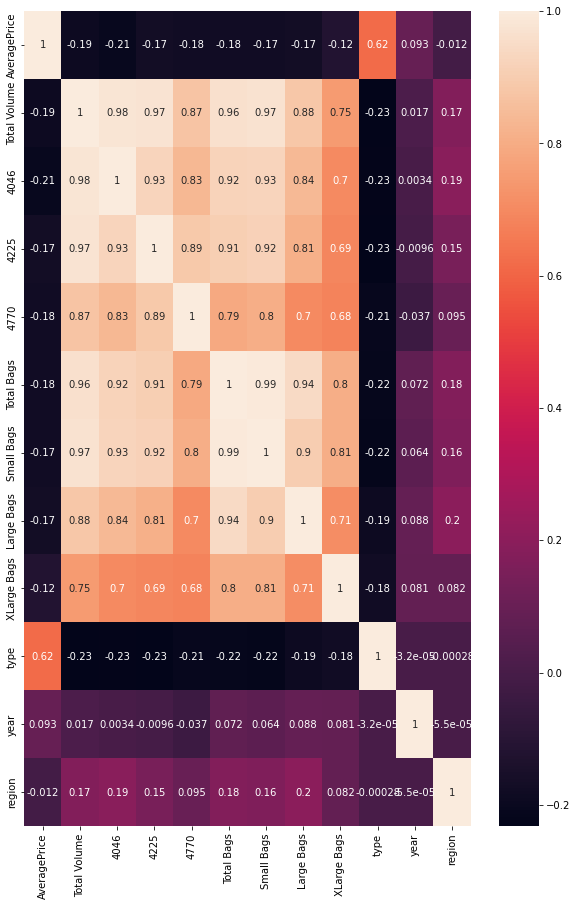

In [19]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True)

Obsevation- Almost all the columns show signs of multicollinearity Further investigation on the same



In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [22]:
df_n=df.drop('Date',axis=1)

In [23]:
df_n=df_n.drop('region',axis=1)

In [24]:
df_n=df_n.drop('type',axis=1)

In [25]:
print(calc_vif(df_n))

      Variables    VIF factor
0  AveragePrice  1.391351e+01
1  Total Volume  5.204945e+09
2          4046  6.937023e+08
3          4225  6.323877e+08
4          4770  4.966241e+06
5    Total Bags  2.502000e+14
6    Small Bags  1.429714e+14
7    Large Bags  1.521486e+13
8   XLarge Bags  7.855161e+10
9          year  1.424078e+01


<AxesSubplot:>

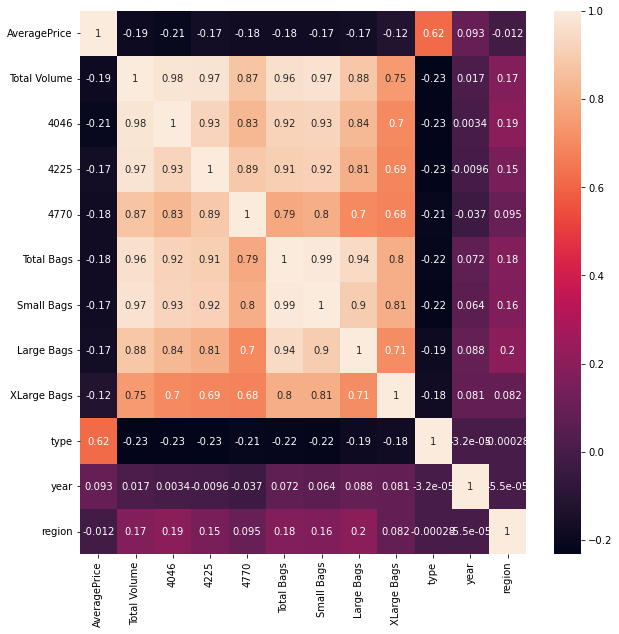

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Observation- The columns small bags,Large Bags,XLarge Bags are highly colinear with the total bags as they are being explained by the total bags columns itself,hence dropping them should.not have a significant effect on the model performance

In [27]:
df.drop('Total Bags',axis=1,inplace=True)
#df.drop('Large Bags',axis=1,inplace=True)
#df.drop('XLarge Bags',axis=1,inplace=True)
#df.head()

* The features 4046,4225,4770 show high colinearity with total volume as they are being explained by the feature already.

In [28]:
df.drop('Total Volume',axis=1,inplace=True)
#df.drop('4225',axis=1,inplace=True)
#df.drop('4770',axis=1,inplace=True)
#df.head()

In [29]:
df

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,53


In [30]:
df['year'].nunique()

4

In [31]:
df['year']=le.fit_transform(df['year'])
df['year'].unique()

array([0, 1, 2, 3], dtype=int64)

In [32]:
#since we already have the year column,the date column is not significant 
df.drop('Date',axis=1,inplace=True)

In [33]:
x1=df.drop('AveragePrice',axis=1)
y1=df['AveragePrice']
df.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


REGRESSION (AVERAGE PRICE PREDICTION)



In [34]:
calc_vif(x1)

,Variables,VIF factor
0,4046,10.628848
1,4225,14.077990
2,4770,5.595269
3,Small Bags,20.647290
4,Large Bags,5.833962
5,XLarge Bags,3.517597
6,type,1.785626
7,year,1.979974
8,region,2.371146


In [35]:
df.describe()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,2.930084e+05,2.951546e+05,2.283974e+04,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.495644
std,0.402677,1.264989e+06,1.204120e+06,1.074641e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.100000,8.540700e+02,3.008780e+03,0.000000e+00,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000
50%,1.370000,8.645300e+03,2.906102e+04,1.849900e+02,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000
75%,1.660000,1.110202e+05,1.502069e+05,6.243420e+03,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000
max,3.250000,2.274362e+07,2.047057e+07,2.546439e+06,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000


* We can see all columns having count 18249. Looks like it doesn't contain missing values


In [36]:
df.columns

Index(['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

Observations: 1.Columns which we can removed now 'Unnamed: 0, 'Date' and 'type' (all are conventional type).



In [37]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [38]:
#creating the dictionary to know which label represents what
le.fit(df['region'])
encoded_data=le.transform(df['region'])
label_value_dict=dict(zip(range(len(le.classes_)),le.classes_))

In [39]:
label_value_dict[0]

0

Observations:

Dataset ready to be used. Scaling will be done after we find ranges of independent variables.

Exploratory Data Analysis



# Graphical Representation


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

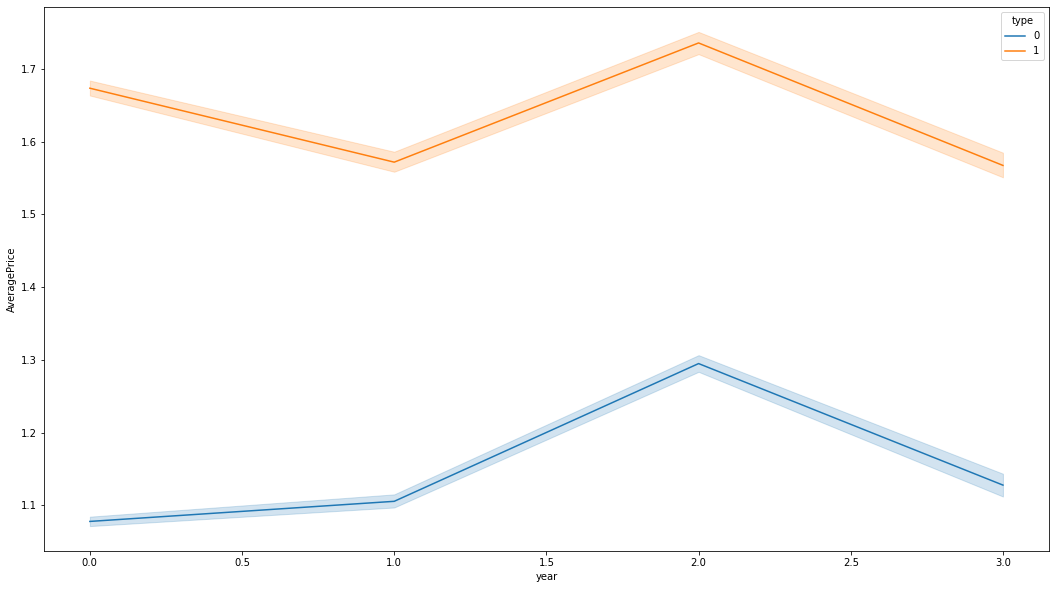

In [41]:
# Lineplot Display distribution of data across all level of category
plt.figure(figsize=(18,10))
sns.lineplot(x='year', y='AveragePrice', hue='type', data=df)
plt.show()


* Just by observing lineplot, The average price is increasing as well as decreasing  frequently throughout the year.



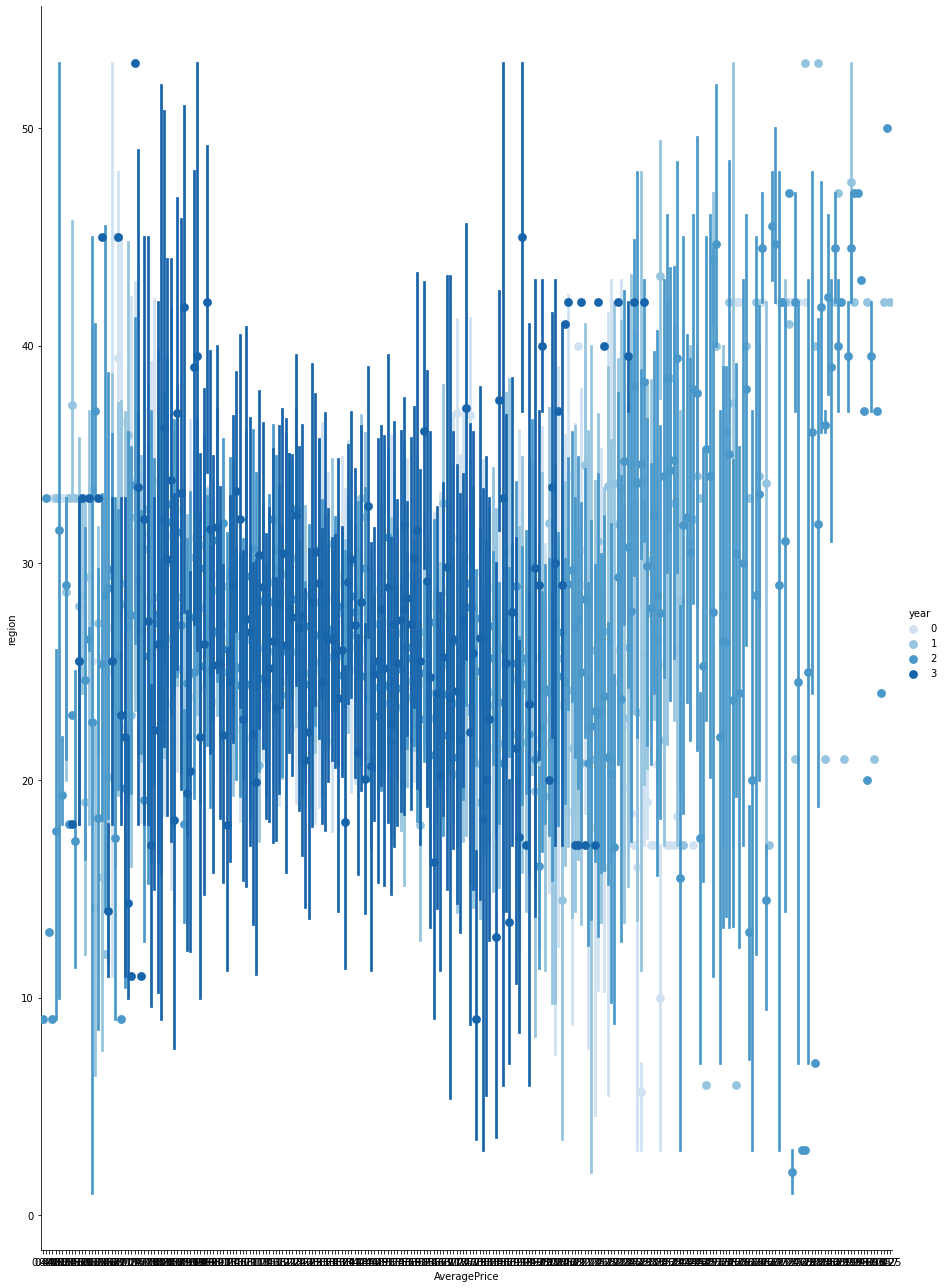

In [42]:
# Factorplot Display distribution of data across all level of category
sns.factorplot('AveragePrice','region',data=df,hue='year',size=18,aspect=0.7,palette='Blues',join=False)

* Just by observing factorplot, the average price is high on some region on 3 year.



<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

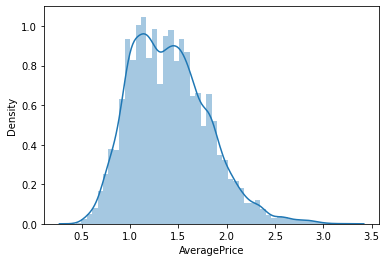

In [43]:
# Distplot Display distribution of data across all level of category
sns.distplot(df['AveragePrice'],kde=True)

* Just by observing distplot, the Average price distribution of avacado price is lies between 1.14 to 3.2.

Conclusion of Graphical Representation

The columns that are going to drop are type,region, unnamed and date.



# Removing Outliers from the Dataset


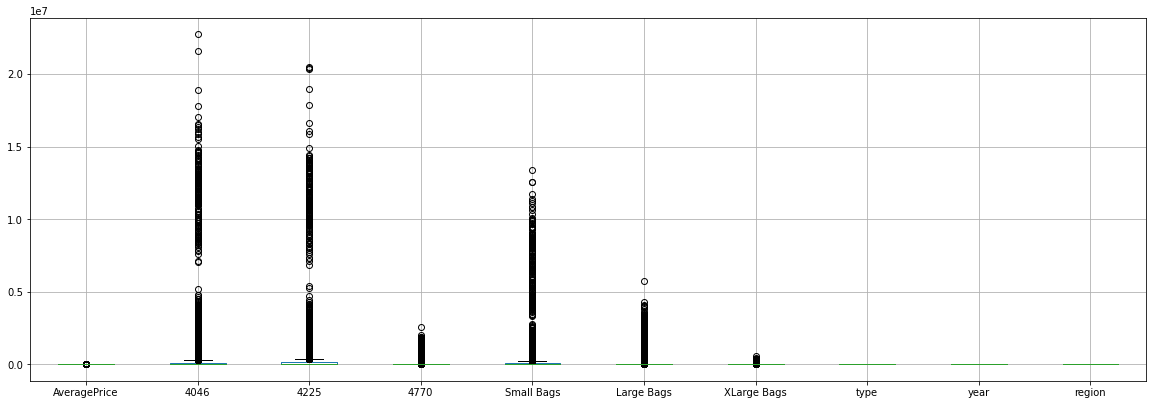

In [44]:
#Boxplot Display distribution of data across all level of category
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Zscore Technique

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.188689,0.230816,0.199902,0.212091,0.232647,0.222352,0.17558,0.999836,1.221282,1.700252
1,0.139020,0.231103,0.208054,0.211997,0.231568,0.222335,0.17558,0.999836,1.221282,1.700252
2,1.182069,0.231007,0.154478,0.211325,0.233399,0.222311,0.17558,0.999836,1.221282,1.700252
3,0.809551,0.230741,0.185350,0.211864,0.236568,0.222186,0.17558,0.999836,1.221282,1.700252
4,0.312861,0.230891,0.208719,0.211834,0.236154,0.221924,0.17558,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.230017,0.243857,0.212540,0.226665,0.220964,0.17558,1.000164,1.970504,1.700811
18245,0.755023,0.230693,0.242277,0.212540,0.232196,0.221403,0.17558,1.000164,1.970504,1.700811
18246,1.152375,0.230693,0.243090,0.205766,0.231644,0.222561,0.17558,1.000164,1.970504,1.700811
18247,1.301382,0.230428,0.242651,0.205774,0.229543,0.222529,0.17558,1.000164,1.970504,1.700811


In [46]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([1, 1, 6, ..., 0, 0, 0], dtype=int64))


In [47]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,0


In [48]:
df.shape                                     # Check the shape of the dataset  


(18249, 10)

In [49]:
df_new.shape                                 # Check new shape of the dataset after removal of outliers


(17651, 10)

In [50]:
Data_loss=((1517-1436)/1517*100)             # Check data loss in dataset after removal of outliers
Data_loss

5.339485827290705

# To ckeck distribution of Skewness.


In [51]:
df.skew()                                      # Check Skewness in dataset


AveragePrice     0.580303
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [52]:
x= df.drop('AveragePrice',axis=1)
y= df['AveragePrice']

# Skewness Handling



In [53]:
x.skew()

4046            8.648220
4225            8.942466
4770           10.159396
Small Bags      9.540660
Large Bags      9.796455
XLarge Bags    13.139751
type            0.000329
year            0.215339
region          0.000030
dtype: float64

In [54]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

* The power transform fuction is used to reduce the skewness.



In [55]:
df_new.skew()

4046          -0.022679
4225          -0.017740
4770           0.032184
Small Bags     0.007058
Large Bags    -0.073809
XLarge Bags    0.793520
type           0.000329
year          -0.091946
region        -0.261443
dtype: float64

In [56]:
x=df_new
x.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.658619,0.307313,-0.247250,-0.340627,-0.773351,-0.699849,-0.999836,-1.308421,-2.011552
1,-0.776870,0.231647,-0.201041,-0.306425,-0.763435,-0.699849,-0.999836,-1.308421,-2.011552
2,-0.731947,0.579503,-0.007072,-0.366303,-0.750820,-0.699849,-0.999836,-1.308421,-2.011552
3,-0.634200,0.415100,-0.148322,-0.496853,-0.691865,-0.699849,-0.999836,-1.308421,-2.011552
4,-0.685293,0.224806,-0.137918,-0.477201,-0.600975,-0.699849,-0.999836,-1.308421,-2.011552


# Regression Model



# Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [58]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.48839053228697205
At random state 0,the testing accuracy is:0.47524554853609624


At random state 1,the training accuracy is:0.4747668145498406
At random state 1,the testing accuracy is:0.48129182533261383


At random state 2,the training accuracy is:0.4827064480075618
At random state 2,the testing accuracy is:0.4775099461579817


At random state 3,the training accuracy is:0.4641858509776726
At random state 3,the testing accuracy is:0.4862324604166791


At random state 4,the training accuracy is:0.4853381782299011
At random state 4,the testing accuracy is:0.4768026017448038


At random state 5,the training accuracy is:0.4763639427475197
At random state 5,the testing accuracy is:0.4809919664181378


At random state 6,the training accuracy is:0.4654304373687975
At random state 6,the testing accuracy is:0.4849406613220466


At random state 7,the training accuracy is:0.48946059413264
At random state 7,the testing accuracy is:0.4750762431359521



In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=1)
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
# predict the value
pred=lr.predict(x_test)
print("predicted ",pred)
print("actual ",y_test)

predicted  [1.74040346 1.24896028 1.05296804 ... 1.12505076 1.12948827 0.97060576]
actual  14192    2.11
1873     0.98
7293     1.17
15087    1.78
9888     1.61
         ... 
17958    1.75
16058    1.65
6750     1.30
3486     0.95
1453     1.03
Name: AveragePrice, Length: 12775, dtype: float64


In [61]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.2240615226592157
Mean squared error: 0.08446863049815348
Root mean squared error: 0.2906348748828218


* The Root mean squared error value is low so we can say this is an good model but we should compare with another model.



In [62]:
predict_test=lr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

48.129182533261385


In [63]:
predict_train=lr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

47.47668145498406


# Cross validation score for Logistic regression model



In [64]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is -1.7255817232135562 and accuracy score for training is 0.4747668145498406 and accuracy score  for testing is 0.48129182533261383


At cross fold(j) the cv score is -0.018385108834738578 and accuracy score for training is 0.4747668145498406 and accuracy score  for testing is 0.48129182533261383


At cross fold(j) the cv score is -0.045315953137205434 and accuracy score for training is 0.4747668145498406 and accuracy score  for testing is 0.48129182533261383


At cross fold(j) the cv score is 0.08602830576123155 and accuracy score for training is 0.4747668145498406 and accuracy score  for testing is 0.48129182533261383


At cross fold(j) the cv score is -0.004727830343840278 and accuracy score for training is 0.4747668145498406 and accuracy score  for testing is 0.48129182533261383


At cross fold(j) the cv score is 0.05207800083528486 and accuracy score for training is 0.4747668145498406 and accuracy score  for testing is 0.48129182533261383


At cross f

The Cross validation score of Avacodo average price for training & testing accuracy score is 32% & 32% respectively.

Lets plot with y_test vs prediction

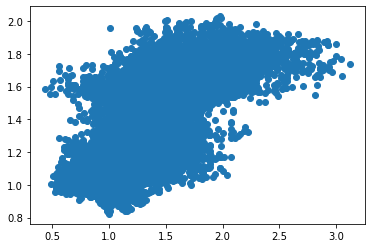

In [65]:
plt.scatter(x=y_test,y=predict_test)

# Decision Tree Regressor Model


In [66]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [67]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:0.5798870387752204


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:0.601230036388988


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:0.5567944095532487


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:0.5611805106941161


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:0.5691908380692063


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:0.5448399335538789


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:0.5875604464850367


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:0.580468832044031


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:0.5799974340002488


At random st

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=8)
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [69]:
# predict the value
pred=dtr.predict(x_test)
print("predicted ",pred)
print("actual ",y_test)

predicted  [1.59 1.63 2.58 ... 1.37 1.34 1.39]
actual  5758     1.67
11927    1.66
16428    2.08
5012     1.49
18007    1.77
         ... 
9974     1.68
410      1.17
15235    2.17
17045    2.12
17955    1.69
Name: AveragePrice, Length: 12775, dtype: float64


In [70]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.1743921722113503
Mean squared error: 0.06732469667318983
Root mean squared error: 0.25947003039501465



* In Decision Tree Classifier model, The Root mean squared error value is low when compared with Linear Rgression model so we can say this is an good model but we should compare with one more model.



In [71]:
predict_test=dtr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

58.33874519608775


In [72]:
predict_train=dtr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

100.0


# Cross validation score for Decision Tree Regressor model



In [73]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is -2.4264343195735907 and accuracy score for training is 1.0 and accuracy score for testing is 0.5833874519608775


At cross fold(j) the cv score is -0.3717720415843045 and accuracy score for training is 1.0 and accuracy score for testing is 0.5833874519608775


At cross fold(j) the cv score is -0.6914767492818026 and accuracy score for training is 1.0 and accuracy score for testing is 0.5833874519608775


At cross fold(j) the cv score is -0.6147715104590925 and accuracy score for training is 1.0 and accuracy score for testing is 0.5833874519608775


At cross fold(j) the cv score is -0.5542424154799098 and accuracy score for training is 1.0 and accuracy score for testing is 0.5833874519608775


At cross fold(j) the cv score is -0.23586406968063295 and accuracy score for training is 1.0 and accuracy score for testing is 0.5833874519608775


At cross fold(j) the cv score is -0.32842847740931524 and accuracy score for training is 1.0 and accuracy score for t

The Cross validation score of Avacodo average price for training & testing accuracy score is 100% & 54% respectively.



# Lets plot with y_test vs prediction



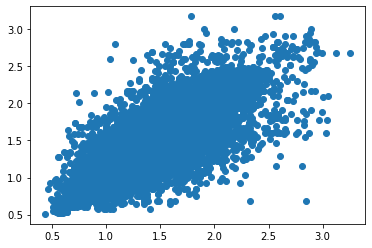

In [74]:
plt.scatter(x=y_test,y=predict_test)

# Random Forest Regressor Model


In [75]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [76]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    rdr.fit(x_train,y_train)
    pred_train=rdr.predict(x_train)
    pred_test=rdr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.9712669314313572
At random state 0,the testing accuracy is:0.7799632334299146


At random state 1,the training accuracy is:0.9694943988345569
At random state 1,the testing accuracy is:0.7927283933036723


At random state 2,the training accuracy is:0.9707546940341891
At random state 2,the testing accuracy is:0.7917515635012491


At random state 3,the training accuracy is:0.9687349427953629
At random state 3,the testing accuracy is:0.7927464496033279


At random state 4,the training accuracy is:0.9698800711758422
At random state 4,the testing accuracy is:0.7893134656772816


At random state 5,the training accuracy is:0.9702608162367106
At random state 5,the testing accuracy is:0.7863971722520101


At random state 6,the training accuracy is:0.9686204296418053
At random state 6,the testing accuracy is:0.7889778258692768


At random state 7,the training accuracy is:0.9678132297385281
At random state 7,the testing accuracy is:0.7876444340934845




In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=1)
rdr.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
# predict the value
pred=rdr.predict(x_test)
print("predicted ",pred)
print("actual ",y_test)

predicted  [1.7227 1.0329 1.3078 ... 1.247  1.0511 1.0421]
actual  14192    2.11
1873     0.98
7293     1.17
15087    1.78
9888     1.61
         ... 
17958    1.75
16058    1.65
6750     1.30
3486     0.95
1453     1.03
Name: AveragePrice, Length: 12775, dtype: float64


In [79]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.13006453228962817
Mean squared error: 0.03381577042661448
Root mean squared error: 0.18389064801292773


* In Random Forest Classifier model, The Root mean squared error value is low when compared with other 2 models.The Random Forest Classifier is best model in this case.

In [80]:
predict_test=rdr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

79.23428324868601


In [81]:
predict_train=rdr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

96.87783624705737


# Cross validation Score for Random Forest Regressor model



In [82]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is -1.9620112723973642 and accuracy score for training is 0.9687783624705737 and accuracy score for testing is 0.7923428324868601


At cross fold(j) the cv score is 0.06632393140366533 and accuracy score for training is 0.9687783624705737 and accuracy score for testing is 0.7923428324868601


At cross fold(j) the cv score is -0.00609263619591105 and accuracy score for training is 0.9687783624705737 and accuracy score for testing is 0.7923428324868601


At cross fold(j) the cv score is 0.21908485168457728 and accuracy score for training is 0.9687783624705737 and accuracy score for testing is 0.7923428324868601


At cross fold(j) the cv score is 0.1639427935712666 and accuracy score for training is 0.9687783624705737 and accuracy score for testing is 0.7923428324868601


At cross fold(j) the cv score is 0.3640483878687615 and accuracy score for training is 0.9687783624705737 and accuracy score for testing is 0.7923428324868601


At cross fold(j) the cv score

The Cross validation score of Avacodo average price for training & testing accuracy score is 96% & 78% respectively.

# Lets plot with y_test vs prediction

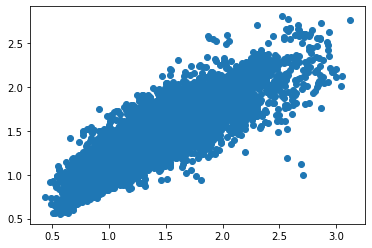

In [83]:
plt.scatter(x=y_test,y=predict_test)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

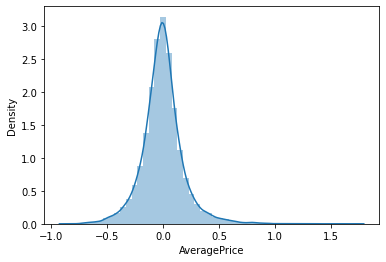

In [84]:
sns.distplot((y_test-pred),bins=50)

* Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.



# Hyper Parameter Tuning


Hyper Parameter Tuning for Linear Regression



In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [86]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
lss=r2_score(y_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 48.12581029010205
Cross Val Score: 8.609192681806968


# Hyper Parameter Tuning for Decision Tree Regressor

In [87]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15)}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [88]:
GCV.best_params_

{'max_depth': 9}

In [89]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=8)

dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_decision=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_decision)
print('R2 Score:',dtrs*100)
dtrscore=cross_val_score(dtr,x,y,cv=5)
dtrc=dtrscore.mean()
print('Cross Val Score:',dtrc*100)

R2 Score: 51.37132134963959
Cross Val Score: 13.361629744586285


# Compare with Actual Final Vs Sample Prediction



,Y Test,Prediction
14192,2.11,1.7227
1873,0.98,1.0329
7293,1.17,1.3078
15087,1.78,1.5660
9888,1.61,1.8988


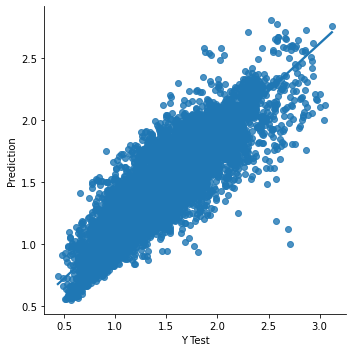

In [93]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Saving the Model


In [95]:
import pickle
filename='Avacado Project.pkl'
pickle.dump(rdr, open(filename, 'wb'))

# Conclusion


With the help of notebook I learnt how EDA can be carried out using Pandas and other plotting libraries.
Also I have seen making use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. I also learnt how to create new features which will in turn help us to better predict the survival.
I also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.
I have seen the impact of columns like type, year/date on the Average price increase/decrease rate.
The most important inference drawn from all this analysis is, I get to know what are the features on which price is highly positively and negatively coorelated with.
I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also get to know where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions.